# 导入数据集

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
f = open('data 2.csv',encoding='UTF-8')
names = ['Index_Num','starttime','resolution','speed','volume','occupancy']
# filename=input("文件名：")
# f=open(filename,encoding='UTF-8')
# names=['作业日期','ηCO','ηH2','TF(℃)','TC(℃)','mass','送风流量']
data=read_csv(f,names=names,header=1)
print(data)

      Index_Num            starttime resolution  speed  volume  occupancy
0            16  2014-02-01T00:35:00    0:05:00    NaN     0.0       0.00
1            18  2014-02-01T00:40:00    0:05:00    NaN     0.0       0.00
2            20  2014-02-01T00:45:00    0:05:00  67.00     1.0       0.00
3            21  2014-02-01T00:50:00    0:05:00  59.14    14.0       1.13
4            23  2014-02-01T00:55:00    0:05:00  62.33     3.0       0.17
...         ...                  ...        ...    ...     ...        ...
5736      15436  2014-02-27T23:00:00    0:05:00  59.33    12.0       0.85
5737      15438  2014-02-27T23:05:00    0:05:00  61.55    11.0       1.20
5738      15439  2014-02-27T23:10:00    0:05:00  61.25     8.0       0.46
5739      15442  2014-02-27T23:15:00    0:05:00  62.00     5.0       0.30
5740      15449  2014-02-27T23:35:00    0:05:00  63.33     6.0        NaN

[5741 rows x 6 columns]


# 先处理重复数据

In [8]:
print (data.isnull().any())   # 这是按照列统计的空值

print("***********************************************")
print (data[data.isnull().values==True]) #查看哪些值是空值
 
# 这里涉及到对空值的处理：删除还是替换然后还有填充（这里删除分为有一个空值删除还是有两个空值删除一行。替换可以用特定值替换或者是用平均值替换）
# tt.fillna(0,inplace=True)  # 根据本例的特点，空值可以填充0

print("***********************************************")

print(data.starttime.duplicated())

Index_Num     False
starttime     False
resolution    False
speed          True
volume         True
occupancy      True
dtype: bool
***********************************************
      Index_Num            starttime resolution  speed  volume  occupancy
0            16  2014-02-01T00:35:00    0:05:00    NaN     0.0        0.0
1            18  2014-02-01T00:40:00    0:05:00    NaN     0.0        0.0
7            35  2014-02-01T01:25:00    0:05:00    NaN     0.0        NaN
7            35  2014-02-01T01:25:00    0:05:00    NaN     0.0        NaN
8            43  2014-02-01T01:45:00    0:05:00    NaN     0.0        0.0
...         ...                  ...        ...    ...     ...        ...
5624      15169  2014-02-27T11:55:00    0:05:00    NaN    59.0        7.2
5625      15183  2014-02-27T12:30:00    0:05:00  60.48    94.0        NaN
5682      15309  2014-02-27T17:45:00    0:05:00  56.03   100.0        NaN
5711      15380  2014-02-27T20:40:00    0:05:00  61.39    31.0        NaN
5740  

In [9]:
data.starttime.drop_duplicates(keep=False,inplace=True)
#  把重复的值全部删除
print(data[data.duplicated(keep=False)])
# 检验。现在没有重复值


Empty DataFrame
Columns: [Index_Num, starttime, resolution, speed, volume, occupancy]
Index: []


# 现在处理缺省值


In [51]:
#https://blog.csdn.net/lwgkzl/article/details/80948548
for tup in data.itertuples():
#     print(tup[0],'-->',tup[1::],type(tup[1:]))
    if data.speed[tup] == nan:
        if tup == 1 :  #先给第一个缺省值赋值
            tmpcount = 0
            while data.speed[tup+tmpcount] == nan :
                tmpcount+=1
            data.speed[tup] = data.speed[tup+tmpcount]
        elif tup >2 and tup <= data.shape[0]: #或者使用 len(data)
            tmpcount = 0
            while data.speed[tup+tmpcount] == nan :
                tmpcount+=1
            data.speed[tup] = (data.speed[tup-1]+data.speed[tup+tmpcount])/2
        elif tup == data.shape[0]+1:
            data.speed[tup] = data.speed[tup-1]
    

KeyError: Pandas(Index=0, starttime='starttime', speed='speed', volume='volume', occupancy='occupancy')

In [15]:
#这里有个问题，就是当我们面临一大堆nan的时候，是否应该根据时间
#speed缺省值填补
count = 1
for count in range(data.shape[0]):
#     print(tup[0],'-->',tup[1::],type(tup[1:]))
    speedtmp = data.loc[count,["speed"]].values
#     print(speedtmp)
#     print(speedtmp.dtype)
    if pd.isnull(speedtmp) :
        if count == 1 :  #先给第一个缺省值赋值
            tmpcount = 0
            while pd.isnull(data.loc[count+tmpcount,["speed"]].values) :
                tmpcount+=1
            data.loc[count,["speed"]] = data.loc[count+tmpcount,["speed"]]
            print("speed第一行为空")
        elif count >2 and count <= data.shape[0]: #或者使用 len(data)
            tmpcount = 0
            while pd.isnull(data.loc[count+tmpcount,["speed"]].values) :
                tmpcount+=1
            data.loc[count,["speed"]] = (data.loc[count-1,["speed"]].values.astype(float)+data.loc[count+tmpcount,["speed"]].values.astype(float))/2
            print(count ,"speed修改成功")
        elif count == data.shape[0]+1:
            data.loc[count,["speed"]] = data.loc[count-1,["speed"]]
            print("speed最后一行为空")
    else :
        pass
    
#volume缺省值填补
count = 1
for count in range(data.shape[0]):
#     print(tup[0],'-->',tup[1::],type(tup[1:]))
    volumetmp = data.loc[count,["volume"]].values
#     print(speedtmp)
#     print(speedtmp.dtype)
    if pd.isnull(volumetmp) :
        if count == 1 :  #先给第一个缺省值赋值
            tmpcount = 0
            while pd.isnull(data.loc[count+tmpcount,["volume"]].values) :
                tmpcount+=1
            data.loc[count,["volume"]] = data.loc[count+tmpcount,["volume"]]
            print("volume第一行为空")
        elif count >2 and count <= data.shape[0]: #或者使用 len(data)
            tmpcount = 0
            while pd.isnull(data.loc[count+tmpcount,["volume"]].values) :
                tmpcount+=1
            data.loc[count,["volume"]] = (data.loc[count-1,["volume"]].values.astype(float)+data.loc[count+tmpcount,["volume"]].values.astype(float))/2
            print(count ,"volume修改成功")
        elif count == data.shape[0]+1:
            data.loc[count,["volume"]] = data.loc[count-1,["volume"]]
            print("volume最后一行为空")
    else :
        pass
    
#occupancy缺省值填补
count = 1
for count in range(data.shape[0]):
#     print(tup[0],'-->',tup[1::],type(tup[1:]))
    occupancytmp = data.loc[count,["occupancy"]].values
#     print(speedtmp)
#     print(speedtmp.dtype)
    if pd.isnull(occupancytmp) :
        if count == 1 :  #先给第一个缺省值赋值
            tmpcount = 0
            while pd.isnull(data.loc[count+tmpcount,["occupancy"]].values) :
                tmpcount+=1
            data.loc[count,["occupancy"]] = data.loc[count+tmpcount,["occupancy"]]
            print("occupancy第一行为空")
        elif count >2 and count <= (data.shape[0]-1): #或者使用 len(data)
            tmpcount = 0
            while pd.isnull(data.loc[count+tmpcount,["occupancy"]].values) :
                tmpcount+=1
                if ((count+tmpcount) > (data.shape[0]-1)):
                    data.loc[count,["occupancy"]] = data.loc[count-1,["occupancy"]]
                    break
            if ((count+tmpcount) <= (data.shape[0]-1)):
                data.loc[count,["occupancy"]] = (data.loc[count-1,["occupancy"]].values.astype(float)+data.loc[count+tmpcount,["occupancy"]].values.astype(float))/2
            else :
                pass
            
            print(count ,"occupancy修改成功")
        elif count == data.shape[0]+1:
            data.loc[count,["occupancy"]] = data.loc[count-1,["occupancy"]]
            print("occupancy最后一行为空")
    else :
        pass
    
print (data)
    


      Index_Num            starttime resolution  speed  volume  occupancy
0            16  2014-02-01T00:35:00    0:05:00    NaN     0.0       0.00
1            18  2014-02-01T00:40:00    0:05:00  67.00     0.0       0.00
2            20  2014-02-01T00:45:00    0:05:00  67.00     1.0       0.00
3            21  2014-02-01T00:50:00    0:05:00  59.14    14.0       1.13
4            23  2014-02-01T00:55:00    0:05:00  62.33     3.0       0.17
...         ...                  ...        ...    ...     ...        ...
5736      15436  2014-02-27T23:00:00    0:05:00  59.33    12.0       0.85
5737      15438  2014-02-27T23:05:00    0:05:00  61.55    11.0       1.20
5738      15439  2014-02-27T23:10:00    0:05:00  61.25     8.0       0.46
5739      15442  2014-02-27T23:15:00    0:05:00  62.00     5.0       0.30
5740      15449  2014-02-27T23:35:00    0:05:00  63.33     6.0       0.30

[5741 rows x 6 columns]


In [16]:
#显示data的相关信息
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5741 entries, 0 to 5740
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index_Num   5741 non-null   int64  
 1   starttime   5741 non-null   object 
 2   resolution  5741 non-null   object 
 3   speed       5740 non-null   float64
 4   volume      5741 non-null   float64
 5   occupancy   5741 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 269.2+ KB


In [106]:
#各种统计量
# data.count() #计数方法count只记非nan值 (axis=1 按列)
# data.describe() #总统计值
# data.max() #最值、累加
# data.min()
# data.sum()
# data.quantile()  #中位数 quantile median
# data.median()   
# data.idxmax()  #最大值的索引值
# #data.argmax()#在0.21版本中删除了
# data.mad(axis=1)   #偏科程度（判断一组数据的最大值和最小值差别是不是很大）
# data.cumsum()  # 样本值累计和
# data.pct_change()  #变化率



starttime    2009-01-31T00:00:00
speed                    142.738
volume                   182.151
occupancy                107.653
dtype: object

#  画图


In [17]:
#建立一个专门为画图而生的dataframe
data_for_plot = data[['speed','volume','occupancy']]

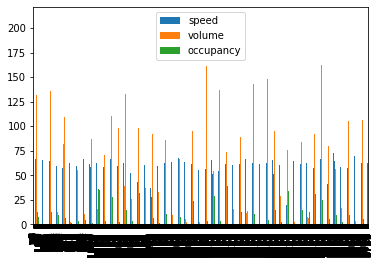

In [18]:
# kind='bar'是柱形图，默认为line
data_for_plot.plot(kind='bar')
plt.show()

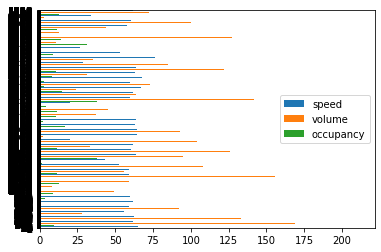

In [19]:
# 横柱形图
data_for_plot.plot(kind='barh')

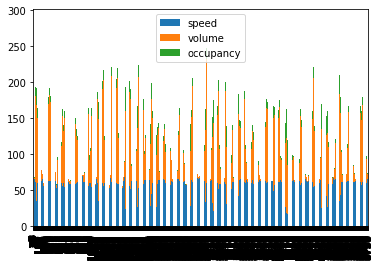

In [20]:
# stacked=True堆叠
data_for_plot.plot(kind='bar',stacked=True)
plt.show()

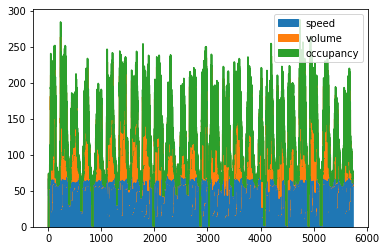

In [21]:
#曲线覆盖面积图
data_for_plot.plot(kind='area')
plt.show()

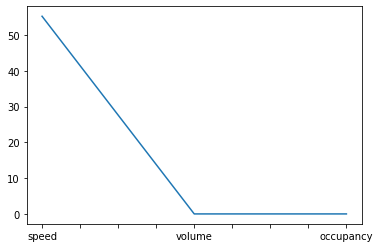

In [22]:
# 画一行
data_for_plot.iloc[10].plot()
plt.show()

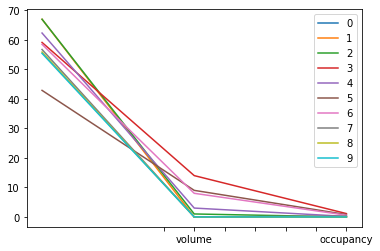

In [23]:
# 画10行
for i in range(10):
# for i in data.index:
    data_for_plot.iloc[i].plot(label=str(i))
plt.legend()
plt.show()

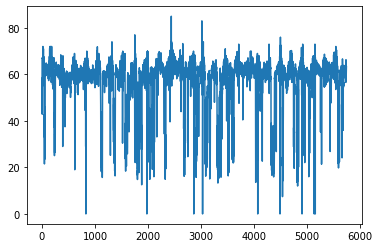

In [24]:
# 画一列
data_for_plot['speed'].plot()
plt.show()

In [140]:
# 转置画行
data_for_plot.T.plot()
plt.show()

ValueError: Image size of 386x129547 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

# 异常值去除

In [25]:
#先进行方差检验，若为零则进行阈值检验，若不为零则进行组合检验，然后进行方差检验
# #以最大值的百分之九十五为界限
# data.max() #最值、累加
# data['speed'].max()
# threshold_speed = data['speed'].max() * 0.95
# data.loc[data['speed'] >= threshold_speed]
from pandas import Series
s= pd.Series()
print(s,s.dtype)
for outliercount in range(2 , data.shape[0]):
#     print(outliercount)
#     tmp = data.loc[outliercount,["speed"]].values.astype(float) - data.loc[outliercount - 1,["speed"]].values.astype(float)
#     print(tmp,tmp.dtype)
    if ( (data.loc[outliercount,["speed"]].values.astype(float) - data.loc[outliercount-1,["speed"]].values.astype(float))**2 ==0 and 
        (data.loc[outliercount,["volume"]].values.astype(float) - data.loc[outliercount-1,["volume"]].values.astype(float))**2 ==0 and 
        (data.loc[outliercount,["occupancy"]].values.astype(float) - data.loc[outliercount-1,["occupancy"]].values.astype(float))**2 ==0) :
        #阈值检测设置速度：0-140；流量：0-225；占用率：0-100；
        if (0<= data.loc[outliercount,["speed"]].values <= 140) & (0<= data.loc[outliercount,["volume"]].values <= 225) & (0<= data.loc[outliercount,["occupancy"]].values <= 100) :#阈值检验
            pass
#             print("阈值检测通过") #阈值检测通过
        else : 
            s= s.append(Series([outliercount]))#添加该行标记到series，之后删除该行数据
            print("添加行", outliercount)
    elif ((data.loc[outliercount,["speed"]].values ==0 and data.loc[outliercount,["volume"]].values ==0 and data.loc[outliercount,["occupancy"]].values !=0) or 
            (data.loc[outliercount,["speed"]].values ==0 and data.loc[outliercount,["volume"]].values !=0 and data.loc[outliercount,["occupancy"]].values ==0) or 
            (data.loc[outliercount,["speed"]].values !=0 and data.loc[outliercount,["volume"]].values ==0 and data.loc[outliercount,["occupancy"]].values ==0) or 
            (data.loc[outliercount,["speed"]].values !=0 and data.loc[outliercount,["volume"]].values !=0 and data.loc[outliercount,["occupancy"]].values ==0) or 
            (data.loc[outliercount,["speed"]].values ==0 and data.loc[outliercount,["volume"]].values !=0 and data.loc[outliercount,["occupancy"]].values !=0)) :
        s= s.append(Series([outliercount])) #加该行标记到series，之后删除该行数据
        print("添加行", outliercount)
    else :
        #组合检验+阈值检验
        #组合检验（注意量纲）：（速度*1000/60）*（占用率*5）/（流量*5）=结果，结果：0-2038
        Combination_testing = (data.loc[outliercount,["speed"]].values*1000/60)*(data.loc[outliercount,["occupancy"]].values*5)/(data.loc[outliercount,["volume"]].values*5)
        if (0<= Combination_testing <=2038) :
            pass
#             print("组合检验通过") #组合检验通过
        else :
            s= s.append(Series([outliercount])) #添加该行标记到series，之后删除该行数据
        if (0<= data.loc[outliercount,["speed"]].values <= 140) & (0<= data.loc[outliercount,["volume"]].values <= 225) & (0<= data.loc[outliercount,["occupancy"]].values <= 100) :#阈值检验
            pass
#             print("阈值检测通过") #阈值检测通过
        else : 
            s= s.append(Series([outliercount])) #添加该行标记到series，之后删除该行数据
            print("添加行", outliercount)
s = s.astype('int')
s = s.sort_values(ascending=False)        
print(s)        
#删除对应列数据
print(data.shape[0])
data.drop(s,inplace=True) #根据S的编号删除
print(data.shape[0])

C:\ProgramData\Anaconda3\envs\mathematical_modeling\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\ProgramData\Anaconda3\envs\mathematical_modeling\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\envs\mathematical_modeling\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide


Series([], dtype: float64) float64
添加行 2
添加行 8
添加行 9
添加行 10
添加行 11
添加行 16
添加行 17
添加行 18
添加行 29
添加行 151
添加行 161
添加行 163
添加行 167
添加行 170
添加行 174
添加行 177
添加行 178
添加行 182
添加行 183
添加行 184
添加行 187
添加行 190
添加行 196
添加行 386
添加行 389
添加行 394
添加行 395
添加行 396
添加行 397
添加行 398
添加行 402
添加行 405
添加行 597
添加行 601
添加行 605
添加行 610
添加行 611
添加行 612
添加行 613
添加行 625
添加行 630
添加行 638
添加行 793
添加行 800
添加行 817
添加行 819
添加行 821
添加行 826
添加行 828
添加行 830
添加行 832
添加行 833
添加行 834
添加行 835
添加行 836
添加行 837
添加行 838
添加行 839
添加行 841
添加行 842
添加行 843
添加行 844
添加行 846
添加行 847
添加行 848
添加行 868
添加行 1032
添加行 1038
添加行 1041
添加行 1045
添加行 1048
添加行 1049
添加行 1051
添加行 1052
添加行 1053
添加行 1055
添加行 1057
添加行 1059
添加行 1060
添加行 1062
添加行 1067
添加行 1073
添加行 1075
添加行 1076
添加行 1079
添加行 1080
添加行 1282
添加行 1294
添加行 1295
添加行 1296
添加行 1297
添加行 1302
添加行 1304
添加行 1307
添加行 1313
添加行 1315
添加行 1319
添加行 1326
添加行 1522
添加行 1523
添加行 1526
添加行 1527
添加行 1528
添加行 1529
添加行 1530
添加行 1531
添加行 1534
添加行 1536
添加行 1537
添加行 1541
添加行 1542
添加行 1544
添加行 1721
添加行 1725
添加行 1731
添加行 1734

# 保存数据

In [26]:
data.to_csv('data 2_change.csv')      #写入csv文件

In [73]:
print(data.shape[0])
data.drop(s,inplace=True)
# for i in range(s.shape[0]):
#     print(s[])
#     data.drop()

print(data.shape[0])

8635
8522


# 是否显示全部print数据

In [59]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50

print(s,s.dtype)

0    8404
0    8373
0    8003
0    7792
0    7792
0    7772
0    7769
0    7481
0    7211
0    6962
0    6943
0    6902
0    6867
0    6626
0    6176
0    6066
0    5198
0    4769
0    4621
0    4064
0    3194
0    3193
0    3192
0    3016
0    3015
0    3014
0    2992
0    2991
0    2990
0    2989
0    2988
0    2987
0    2986
0    2985
0    2984
0    2983
0    2982
0    2981
0    2980
0    2965
0    2964
0    2962
0    2961
0    2959
0    2958
0    2956
0    2955
0    2954
0    2952
0    2951
0    2950
0    2949
0    2948
0    2947
0    2946
0    2945
0    2944
0    2943
0    2942
0    2941
0    2940
0    2939
0    2938
0    2937
0    2936
0    2935
0    2934
0    2933
0    2932
0    2931
0    2930
0    2929
0    2928
0    2927
0    2926
0    2925
0    2924
0    2921
0    2920
0    2919
0    2918
0    2917
0    2916
0    2915
0    2914
0    2913
0    2911
0    2908
0    2907
0    2906
0    2905
0    2904
0    2857
0    2613
0    2350
0    2331
0    2126
0    2079
0    2054
0    2053


In [45]:
speedtmp = data.loc[9,["speed"]]
print(speedtmp)

speed    121.740294
Name: 9, dtype: object


In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


n = 10
a = np.zeros((n, n))
plt.figure()

for i in range(n):
    plt.imshow(a)
    plt.show()
    a[i, i] = 1
    clear_output(wait=True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
plt.figure()
x = [1,2,3]
y = [4,5,6]
plt.plot(x,y)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [1]:
import sys
sys.path   #查看导入包的路径
sys.executable  #查看使用kernel的路径


'C:\\ProgramData\\Anaconda3\\envs\\mathematical_modeling\\python.exe'